# Dummy marketing and Sales Data

This data contains a number of products' sales with corresponding budgets (TV, Radio, Social Media, Influencer)

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [30]:
df=pd.read_csv('../Денис/dataset/Dummy Data HSS.csv')

In [28]:
print(df.shape)
df.head(15)

(4546, 5)


,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,3,54.732757
1,13.0,9.237765,2.409567,3,46.677897
2,41.0,15.886446,2.913410,3,150.177829
3,83.0,30.020028,6.922304,3,298.246340
4,15.0,8.437408,1.405998,1,56.594181
5,29.0,9.614382,1.027163,3,105.889148
6,55.0,24.893811,4.273602,1,198.679825
7,31.0,17.355042,2.289855,0,108.733932
8,76.0,24.648898,7.130116,2,270.189400
9,13.0,0.431128,2.229423,3,48.280582


1. **TV** - TV budget, in mln 
2. **Radio** - Radio budet, in mln \n
3. **SM**- Social Media budget, in mln
4. **Influencer** - Affiliate marketing through well-known persons, the popularity is measured by (Nano,Micro,Macro,Mega)
5. **Sales** in mln

### Cleaning the data

In [128]:
print(df.isnull().sum())
df.info()

TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4546 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4546 non-null   float64
 1   Radio         4546 non-null   float64
 2   Social Media  4546 non-null   float64
 3   Influencer    4546 non-null   int64  
 4   Sales         4546 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 213.1 KB


Since we have a small number of Nan, we can simply remove them

In [31]:
df.dropna(inplace=True)
df.shape

(4546, 5)

### Exploratory data analysis

In [4]:
df.describe()

,TV,Radio,Social Media,Sales
count,4562.000000,4568.000000,4566.000000,4566.000000
mean,54.066857,18.160356,3.323956,192.466602
std,26.125054,9.676958,2.212670,93.133092
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.525957,1.527849,112.322882
50%,53.000000,17.859513,3.055565,189.231172
75%,77.000000,25.649730,4.807558,272.507922
max,100.000000,48.871161,13.981662,364.079751


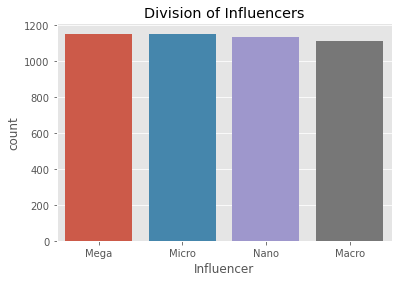

In [118]:
sns.countplot(x='Influencer',data=df).set_title('Division of Influencers');

In [132]:
col=['Sales','TV','Radio','Social Media']

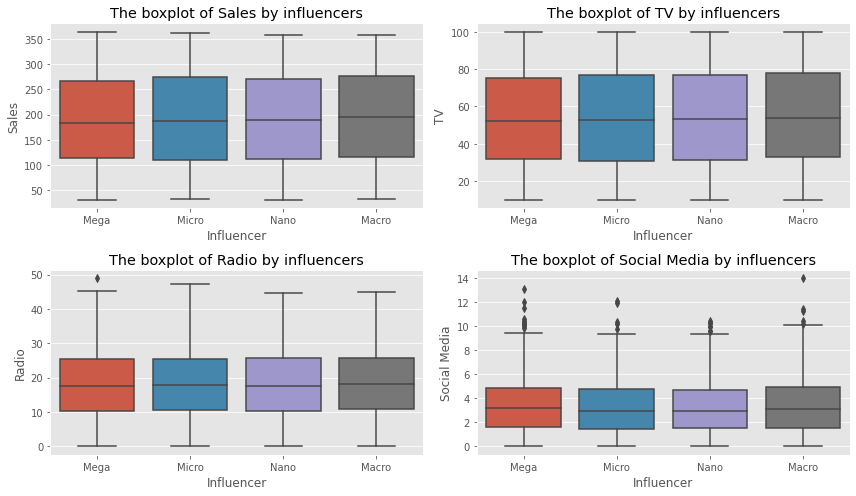

In [55]:
f=plt.figure(figsize=(12,7))
for i,cols in enumerate(df[col]):
    ax=f.add_subplot(2,2,i+1)
    sns.boxplot(y=cols,data=df,x='Influencer')
    ax.set_title('The boxplot of '+cols+' by influencers')
f.tight_layout()

In [53]:
def plottec(kind,col):
    fig=plt.figure(figsize=(12,7))
    for i, feature in enumerate(col):
            ax=fig.add_subplot(2,2,i+1)
            df.groupby('Influencer')[feature].sum().plot(ax=ax,kind=kind)
            ax.set_title(feature+" Distribution by Influencer",color='DarkRed')

    fig.tight_layout()  
    plt.show()

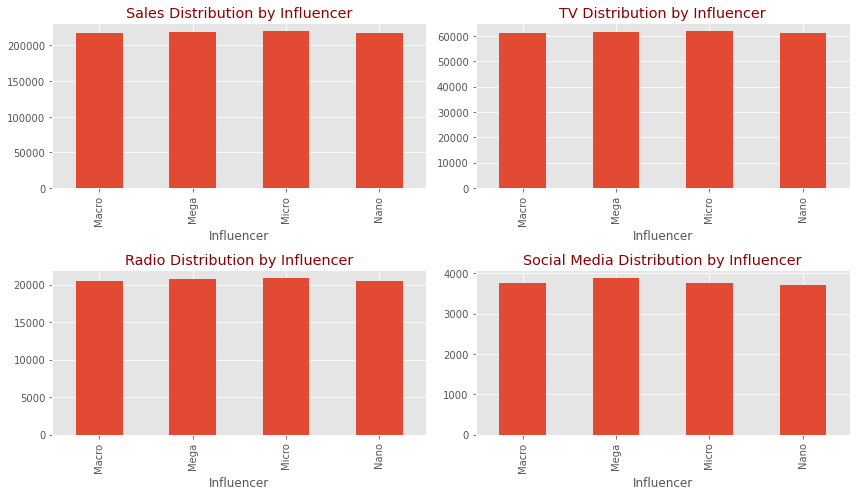

In [54]:
plottec('bar',col)

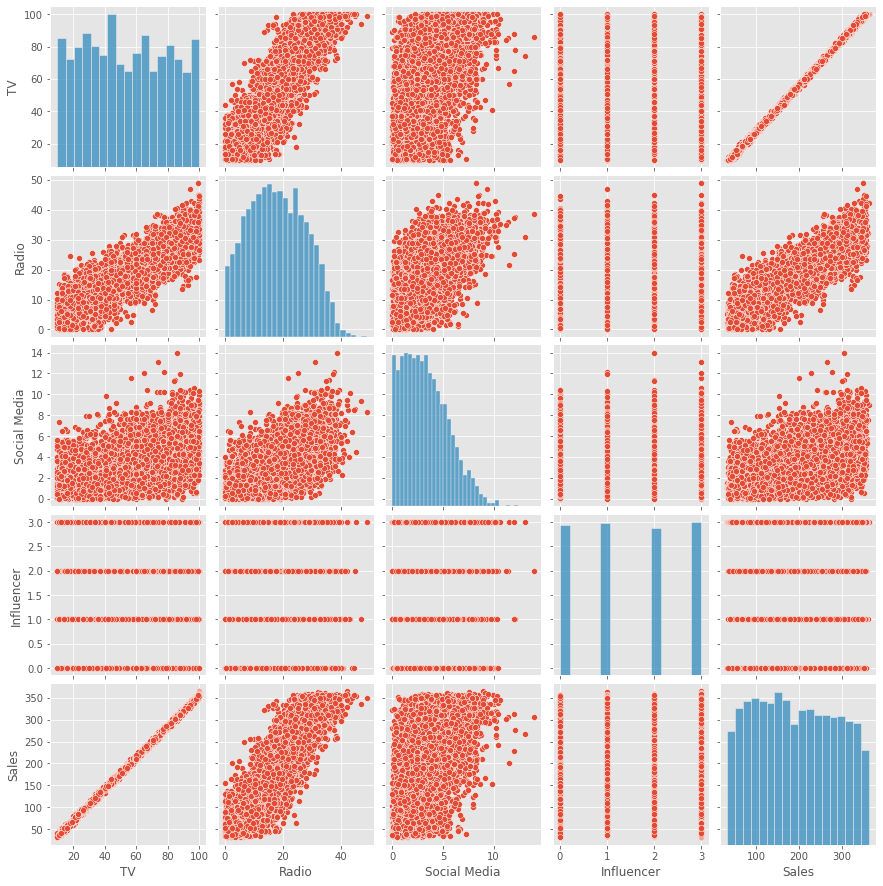

In [129]:
sns.pairplot(df);

### Prediction of Sales

Since we want to predict a number of sales depending on our features, lets ,first of all, transform our categorical variables into numeric ones. As we have a gradation, we use a label encoder

In [32]:
df1=df
df1['Influencer']=df1['Influencer'].replace({'Mega':3,'Macro':2,'Micro':1,'Nano':0})

In [51]:
df1

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,3,54.732757
1,13.0,9.237765,2.409567,3,46.677897
2,41.0,15.886446,2.913410,3,150.177829
3,83.0,30.020028,6.922304,3,298.246340
4,15.0,8.437408,1.405998,1,56.594181
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,1,94.685866
4568,71.0,20.610685,6.545573,0,249.101915
4569,44.0,19.800072,5.096192,1,163.631457
4570,71.0,17.534640,1.940873,2,253.610411


In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor

We are going to asses models by following metrics: **MSE, R-squared**

In [157]:
def metrics(test,pred):
    print('MSE',round(mean_squared_error(test,pred),15))
    print('MAE',round(mean_absolute_error(test,pred),15))
    print('RMSE',round(np.sqrt(mean_squared_error(test,pred)),15))
    print('R2',round(r2_score(test,pred),15))

In [90]:
y=df1['Sales']
x=df1.drop('Sales',axis=1)

In [91]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1111)

Lets create a **Decision tree** for regression problems

In [92]:
dt=DecisionTreeRegressor(max_depth=4,min_samples_leaf=0.1,random_state=1111)
dt.fit(x_train,y_train)
y_pred_tree=dt.predict(x_test)

In [109]:
metrics(y_test,y_pred_tree)

MSE 146.91
MAE 10.41
RMSE 12.12
R2 0.983


Also lets conduct **cross validation**

In [114]:
cross_r2=cross_val_score(dt,x,y,cv=10).mean()
cross_mse=cross_val_score(dt,x,y,cv=10,scoring='neg_mean_squared_error').mean()
print('MSE',-cross_mse)
print('R2',cross_r2)

MSE 144.4999314147075
R2 0.9832527217239292


We can observe a pretty good R squared, which is spectacular result. Lets try **Multiple Regression**

In [154]:
pipe=Pipeline(steps=[('scale',StandardScaler())])

In [158]:
x_train=pipe.fit_transform(x_train)
x_test=pipe.transform(x_test)
lm=LinearRegression()
lm.fit(x_train,y_train)
y_pred=lm.predict(x_test)
metrics(y_test,y_pred)

MSE 8.0318989975401
MAE 2.27765831467839
RMSE 2.834060514092828
R2 0.999097380104832


Also lets conduct **cross validation**

In [120]:
cross_r2_reg=cross_val_score(pipe,x,y,cv=10).mean()
cross_mse_reg=cross_val_score(pipe,x,y,cv=10,scoring='neg_mean_squared_error').mean()
print('MSE',-cross_mse_reg)
print('R2',cross_r2_reg)

MSE 8.71318318811487
R2 0.9989903907021797


In [145]:
cross_r2_reg=cross_val_score(lm,x,y,cv=10).mean()
cross_mse_reg=cross_val_score(lm,x,y,cv=10,scoring='neg_mean_squared_error').mean()
print('MSE',-cross_mse_reg)
print('R2',cross_r2_reg)

MSE 8.71318318811488
R2 0.9989903907021797


#### Compare perfomance

In [130]:
if cross_mse>cross_mse_reg: print('Decision tree is better in terms of MSE')
else: print('Linear Regression  is better in terms of MSE')
    
if cross_r2>cross_r2_reg: print('Decision tree is better in terms of R2')
else: print('Linear Regression  is better in terms of R2')

Linear Regression  is better in terms of MSE
Linear Regression  is better in terms of R2


Seems that Linear Regression perfoms much better, lets check our residuals for normality

C:\Users\Public\Videos\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


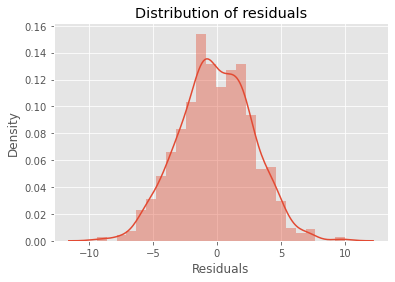

In [126]:
sns.distplot((y_test-y_pred))
plt.title('Distribution of residuals')
plt.xlabel('Residuals');

In [123]:
from scipy.stats import shapiro
shapiro(y_test-y_pred)

ShapiroResult(statistic=0.9988740086555481, pvalue=0.8545450568199158)

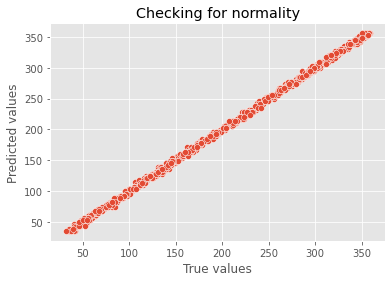

In [127]:
sns.scatterplot(x=y_test,y=y_pred)
plt.title('Checking for normality')
plt.ylabel('Predicted values')
plt.xlabel('True values');

### The assumptions of Linear regression are met, residuals have mean 0 and normal curve, but lets check model for multicollinearity

<AxesSubplot:>

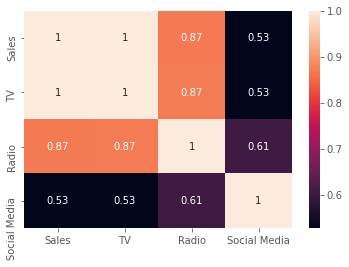

In [134]:
sns.heatmap(df1[col].corr(),annot=True)

In [180]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Vif factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['feature']=x.columns

In [193]:
vif.round(1).sort_values(by='Vif factor',ascending=False)

,Vif factor,feature
1,21.1,Radio
0,19.3,TV
2,5.0,Social Media
3,2.1,Influencer


Indeed, **TV and Radio** are highly correlated that mess our model, lets remove the most correlated

In [185]:
df2=df1.drop('Radio',axis=1)

In [186]:
y2=df2['Sales']
x2=df2.drop('Sales',axis=1)

In [189]:
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.2,random_state=1111)

In [190]:
x2_train=pipe.fit_transform(x2_train)
x2_test=pipe.transform(x2_test)
lm=LinearRegression()
lm.fit(x2_train,y2_train)
y2_pred=lm.predict(x2_test)
metrics(y2_test,y2_pred)

MSE 8.032203593443738
MAE 2.27764447008086
RMSE 2.834114252009565
R2 0.999097345874531


## Eventually, we see that Linear regression perfoms better compared to Decision Tree